In [ ]:
import numpy as np
import csv
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

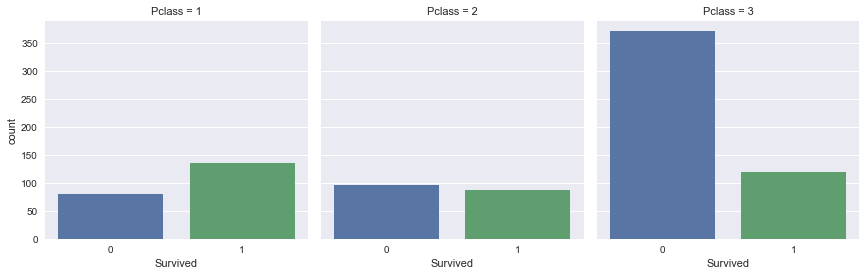

In [4]:
%matplotlib inline
#Pclass has no Null we check for the impact on survivied
import seaborn as ss

ss.set()
ss.factorplot(x='Survived', col='Pclass' , kind='count', data = train_data);

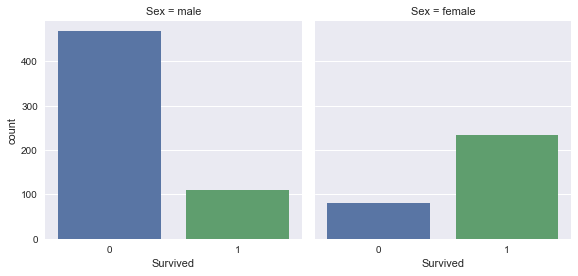

In [5]:
ss.factorplot(x='Survived', col='Sex' , kind='count', data = train_data);

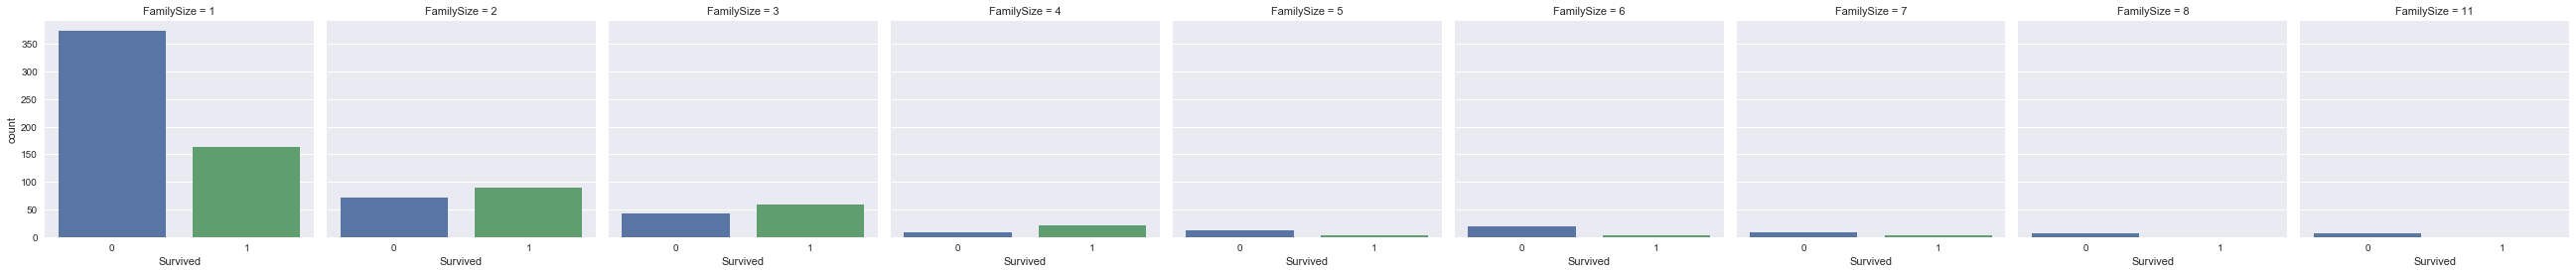

In [6]:
for data in [train_data]:
    data['FamilySize'] = data['SibSp'] + data['Parch']+1



# train_data['FamilySize'] = train_data.FamilySize.fillna(train_data.FamilySize.mean())
ss.factorplot(x='Survived', col='FamilySize' , kind='count', data = train_data);

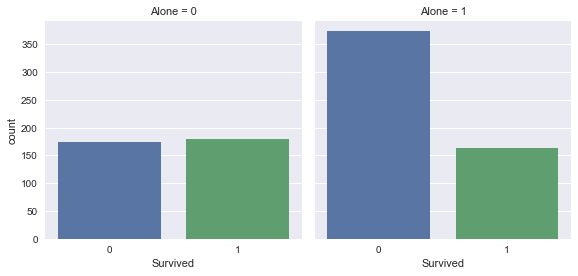

In [7]:
for data in [train_data]:
    data['Alone'] = 0
    data.loc[data['FamilySize']==1, 'Alone'] = 1

ss.factorplot(x='Survived', col='Alone' , kind='count', data = train_data);

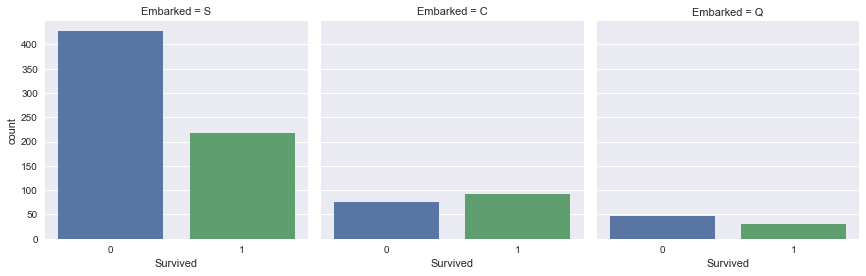

In [8]:
#  Embarked max S occurred so replace null with that

train_data['Embarked'] = train_data.Embarked.fillna(train_data.Embarked.mode())

ss.factorplot(x='Survived', col='Embarked' , kind='count', data = train_data);

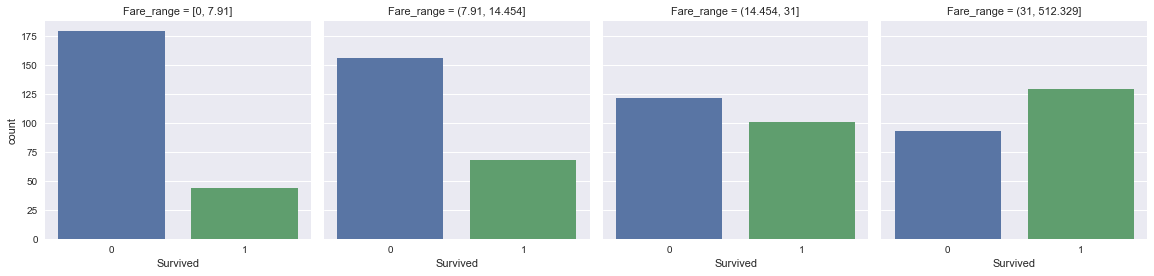

In [9]:
train_data['Fare'] = train_data.Fare.fillna(train_data.Fare.median())

# ss.factorplot(x='Survived', col='Fare' , kind='count', data = train_data);
train_data['Fare_range'] = pd.qcut(train_data['Fare'],4)

ss.factorplot(x='Survived', col='Fare_range' , kind='count', data = train_data)

In [10]:
# Fill up the nan values of age with random value taken from the set which has mean and std dev same as that of the 
# ages given in our dataset

ag_avg = train_data['Age'].mean()
ag_dev = train_data['Age'].std()
ag_no_of_val_needed = train_data['Age'].isnull().sum()

ag_list_fill = np.random.randint(ag_avg - ag_dev , ag_avg + ag_dev, size=ag_no_of_val_needed )

train_data['Age'][np.isnan(train_data['Age'])] = ag_list_fill
train_data['Age'] = train_data['Age'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


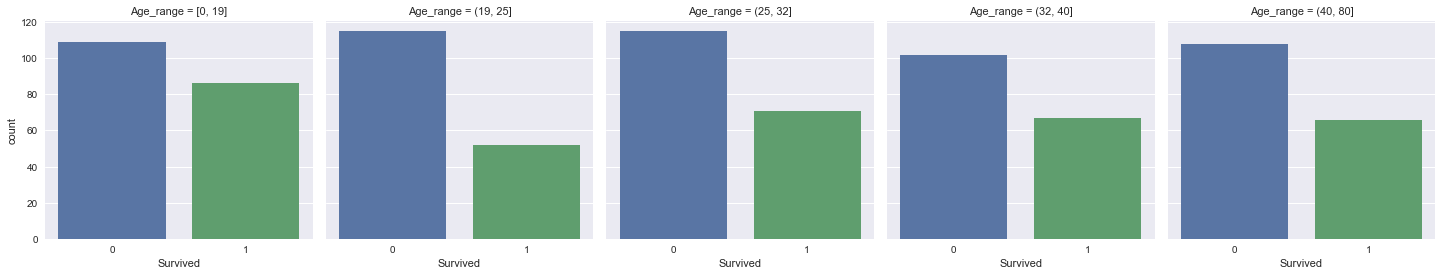

In [11]:
train_data['Age_range'] = pd.qcut(train_data['Age'],5)
ss.factorplot(x='Survived', col='Age_range' , kind='count', data = train_data)

In [12]:
train_data = pd.get_dummies(train_data, columns=['Sex'] , drop_first=True)
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=False)

In [13]:
from sklearn import preprocessing
train_data_header = ['Fare_range' , 'Age_range' ]
for i in train_data_header:
    le = preprocessing.LabelEncoder()
    le.fit(train_data[i])
    train_data[i] = le.transform(train_data[i])
print(train_data.head(2))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   38      1      0   

      Ticket     Fare Cabin  FamilySize  Alone  Fare_range  Age_range  \
0  A/5 21171   7.2500   NaN           2      0           3          0   
1   PC 17599  71.2833   C85           2      0           1          2   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         1           0           0           1  
1         0           1           0           0  


In [14]:
final_data = train_data[['Sex_male', 'Fare_range', 'Age_range','Pclass', 'FamilySize','Alone','Embarked_C','Embarked_Q','Embarked_S']]
labels = train_data['Survived']

In [15]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(final_data,labels,test_size=0.20, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(n_estimators=500)
randomforest.fit(x_train,y_train)
l =randomforest.score(x_test,y_test)
print("Random Forest : " ,l)

Random Forest :  0.832402234637


In [18]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] +1
test_data['Alone'] = 0
test_data.loc[data['FamilySize']==1,'Alone'] = 1
test_data['Embarked'] =  test_data.Embarked.fillna(test_data.Embarked.mode())
test_data['Fare'] = test_data.Fare.fillna(test_data.Fare.median())
test_data['Fare_range'] = pd.qcut(test_data['Fare'],4)



ag_avg = test_data['Age'].mean()
ag_dev = test_data['Age'].std()
ag_no_of_val_needed = test_data['Age'].isnull().sum()

ag_list_fill = np.random.randint(ag_avg - ag_dev , ag_avg + ag_dev, size=ag_no_of_val_needed )

test_data['Age'][np.isnan(test_data['Age'])] = ag_list_fill
test_data['Age'] = test_data['Age'].astype(int)

test_data['Age_range'] = pd.qcut(test_data['Age'],5)

test_data = pd.get_dummies(test_data, columns=['Sex'] , drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=False)

train_data_header = ['Fare_range' , 'Age_range' ]
for i in train_data_header:
    le = preprocessing.LabelEncoder()
    le.fit(test_data[i])
    test_data[i] = le.transform(test_data[i])

final_test_data = test_data[['Sex_male', 'Fare_range', 'Age_range','Pclass', 'FamilySize','Alone','Embarked_C','Embarked_Q','Embarked_S']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
randomforest.fit(final_data,labels)
k = randomforest.predict(final_test_data)
test_data['Survived'] = k

write = test_data[['PassengerId','Survived']]
write.to_csv('output.csv', index=False)